## Task 44 - Supervised learning V: Decision Trees II

#### Hemant Thapa

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [2]:
df = pd.read_csv('Titanic.csv')
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleansing

#### Checking Row and columns

In [3]:
df.shape

(891, 12)

#### Checking data types

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Checking Unique Columns and converting into lowercase

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.columns=df.columns.str.lower()
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

#### Checking null values

In [7]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

<font color='blue'>There are 177 null values in age, 687 null values in cabin, and 2 null values in embarked

#### Missing count

In [8]:
missing_values_count = df.isnull().sum().sum()
missing_values_count

866

In [9]:
total_cells = np.product(df.shape)
total_cells

10692

In [10]:
print(f'Total Missing Values in dataset: {round(missing_values_count/total_cells*100,4)}%')

Total Missing Values in dataset: 8.0995%


#### Checking unique null values in dataset

In [11]:
df.columns[df.isna().any()]

Index(['age', 'cabin', 'embarked'], dtype='object')

####  <font color='blue'>1. Treating age null values

In [12]:
df.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [13]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [14]:
#Easiest way to treat nan value in age is though imputation of mean value
mean_value_age = df.age.mean()
mean_value_age

29.69911764705882

In [15]:
df.age = df.age.replace(np.nan,mean_value_age)
df.age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

#### <font color='blue'>2. Treating cabin null values

In [16]:
df.columns[df.isna().any()]

Index(['cabin', 'embarked'], dtype='object')

In [17]:
df.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
#We have removed cabin columns and there is no logical reason to replace each specific values
#Inserting wrong value can cause error in predictions
df.drop('cabin',axis=1, inplace=True)
df[:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### <font color='blue'> 3.Treating Embarked null values

In [19]:
df.columns[df.isna().any()]

Index(['embarked'], dtype='object')

In [20]:
#Unique columns
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
#Missing unique row and columns
df[df.isna().any(axis=1)]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


#### After analysing embarked missing rows, we have realised common thing between them are survival and pclass1, their fare price is also high and both are female

In [22]:
#Iterating through dataframe and taking out all the passenger with pclass1
mask = (df['pclass'] == 1)
result = df[mask]
result[0:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S


In [23]:
result.shape

(216, 11)

#### Now we have common data, which have same pclass1

In [24]:
#Grouping according to embarked S,C & Q
counts = result['embarked'].value_counts()
counts

S    127
C     85
Q      2
Name: embarked, dtype: int64

#### Pclass1 has nearly S:127, C:85, and Q:2

In [25]:
#Let say, we have data. where fare were above 80 and less than 100
#We have shrink those above pclass1 dataframe scale to price between 80-100
mask = (df['fare'] >= 80) & (df['fare'] <= 100)
result2 = df[mask]
result2

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.4750,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.000000,1,0,19943,90.0000,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.000000,1,0,36973,83.4750,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.000000,2,0,19928,90.0000,Q
257,258,1,1,"Cherry, Miss. Gladys",female,30.000000,0,0,110152,86.5000,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.000000,1,0,11967,91.0792,C
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.000000,0,0,11767,83.1583,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,29.699118,1,0,PC 17604,82.1708,C


In [26]:
result2['sex'].value_counts()

female    16
male       7
Name: sex, dtype: int64

In [27]:
female_count = (result2['sex'] == 'female')
female_count = result2[female_count]
female_count

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,NaN
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.000000,1,0,36973,83.4750,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.000000,0,0,110152,86.5000,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.000000,1,0,11967,91.0792,C
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.000000,0,0,11767,83.1583,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,29.699118,1,0,PC 17604,82.1708,C
412,413,1,1,"Minahan, Miss. Daisy E",female,33.000000,1,0,19928,90.0000,Q
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.000000,1,0,19943,90.0000,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.000000,0,0,110152,86.5000,S
520,521,1,1,"Perreault, Miss. Anne",female,30.000000,0,0,12749,93.5000,S


In [28]:
emabarked_female_count = female_count['embarked'].value_counts()
emabarked_female_count

S    7
C    6
Q    1
Name: embarked, dtype: int64

#### While observing and our analogy says, dataset above, S still has highest and C is second lowest and Q is the lowest. 
where, S:7, C:6, & Q:1 

In [29]:
#Replacing nan values with S
df.embarked = df.embarked.replace(np.nan, 'S')
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [30]:
#Checking nan value again
df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

### Data manipulation

#### Converting gender into binary digit

In [31]:
df.sex = df.sex.replace('female',0)

In [32]:
df.sex = df.sex.replace('male',1)

In [33]:
df.sex = df.sex.astype('category')

In [34]:
df.sex.unique()

[1, 0]
Categories (2, int64): [0, 1]

Checking male and female in binary digit

In [35]:
gender_count = df.sex.value_counts()
gender_count 

1    577
0    314
Name: sex, dtype: int64

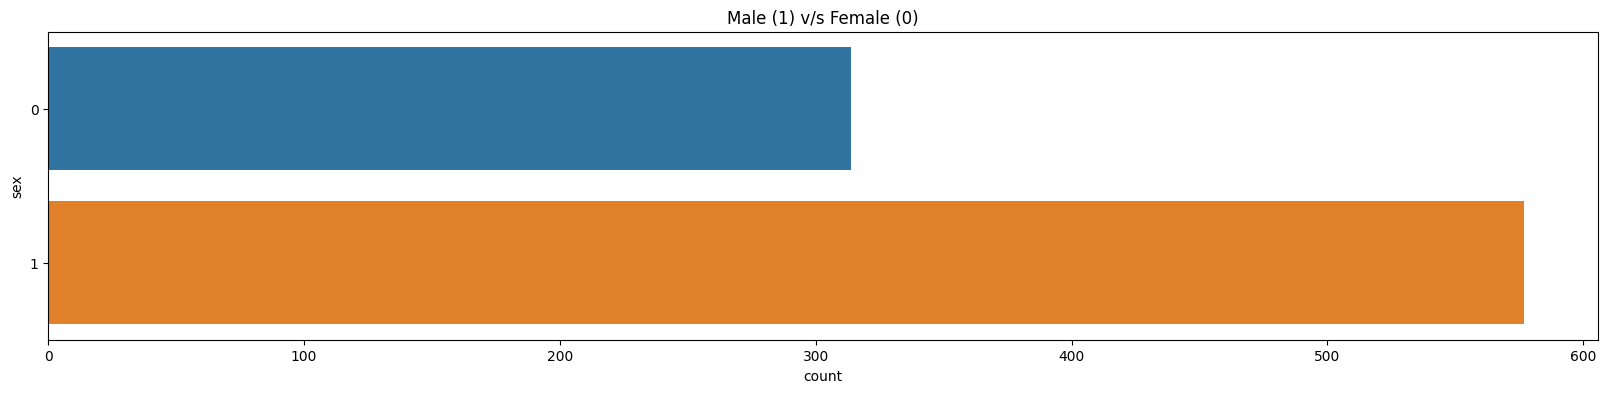

In [36]:
fig = plt.figure(figsize=(20,4))
ax = sns.countplot(y='sex', data=df)
plt.title('Male (1) v/s Female (0)')
plt.show()

#### Converting embarked columns into three different digits

In [37]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [38]:
df.embarked = df.embarked.replace('S',0)

In [39]:
df.embarked = df.embarked.replace('C',1)

In [40]:
df.embarked = df.embarked.replace('Q',2)

In [41]:
df.embarked = df.embarked.astype('category')

In [42]:
df.embarked.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

Checking Embarked in binary digit

In [43]:
df.embarked.value_counts()

0    646
1    168
2     77
Name: embarked, dtype: int64

#### Cheking row and columns 

In [44]:
df.shape

(891, 11)

#### Checking data types

In [45]:
df.dtypes

passengerid       int64
survived          int64
pclass            int64
name             object
sex            category
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked       category
dtype: object

## Machine Learning 

Defining Dependent and Independent Variables

In [46]:
df[:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [47]:
df['age'] = df['age'].astype(int)

In [48]:
#Independent variable
x = df.iloc[:,[2,4,5,6,7,9,10]]
x

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22,1,0,7.2500,0
1,1,0,38,1,0,71.2833,1
2,3,0,26,0,0,7.9250,0
3,1,0,35,1,0,53.1000,0
4,3,1,35,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,0
887,1,0,19,0,0,30.0000,0
888,3,0,29,1,2,23.4500,0
889,1,1,26,0,0,30.0000,1


In [49]:
#Dependent Variable
y = df.iloc[:,1]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [50]:
print(f'shape of Independent variable: {x.shape}')
print(f'shape of Dependent variable: {y.shape}')

shape of Independent variable: (891, 7)
shape of Dependent variable: (891,)


## TRAIN, TEST AND SPLIT

The independent variables and dependent variable respectively. train_size argument is set to 0.8, meaning 80% of the data will be used for training and 20% for testing. The shuffle argument is set to True, meaning the data will be shuffled randomly before splitting into training and testing sets.

In [51]:
r = 7 #random_state

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state=r)

## DECISION TREE CLASSIFIER

In [53]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=True)
unpruned.fit(x_train, y_train)
print("Performance without pruning:", unpruned.score(x_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7541899441340782
At depth: 21


In [54]:
md = 21 #Max_depth

In [55]:
# Create an instance of the DecisionTreeClassifier
base_model = DecisionTreeClassifier(max_depth=md)
# Create an instance of the BaggingClassifier ensemble
ensemble = BaggingClassifier(base_estimator=base_model, n_estimators=100, random_state=r)


In [56]:
# Fit the base_model to the training data
base_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=21)

In [57]:
# Fit the ensemble to the training data
ensemble.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=21),
                  n_estimators=100, random_state=7)

In [58]:
# Evaluate the base_model performance
print('Base model Accuracy:', base_model.score(x_test, y_test))
print()
# Evaluate the ensemble performance
print('Ensemble model Accuracy:', ensemble.score(x_test, y_test))

Base model Accuracy: 0.7653631284916201

Ensemble model Accuracy: 0.7932960893854749


## RANDOM FOREST

In [59]:
## RANDOM FOREST# Create an instance of the RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=md)

# Fit the model to the training data
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=21)

In [60]:
print(f'Radom forest Model accuracy: {random_forest_model.score(x_test,y_test)}')

Radom forest Model accuracy: 0.776536312849162


## ADABOOST  CLASSIFIER

In [61]:
# Create an instance of the AdaBoostClassifier
adamodel = AdaBoostClassifier(n_estimators=100, random_state=r)

# Fit the model to the training data
adamodel.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [62]:
# Evaluate the model's performance
print(f'AdaBoost Classifier Accuracy: {adamodel.score(x_test, y_test)}')

AdaBoost Classifier Accuracy: 0.770949720670391


#### Report of all the ML classification model used above:

In [63]:
print('Base model Accuracy:', base_model.score(x_test, y_test))
print()
print('Ensemble model Accuracy:', ensemble.score(x_test, y_test))
print()
print(f'Radom forest Model accuracy: {random_forest_model.score(x_test,y_test)}')
print()
print(f'AdaBoost Classifier Accuracy: {adamodel.score(x_test, y_test)}')

Base model Accuracy: 0.7653631284916201

Ensemble model Accuracy: 0.7932960893854749

Radom forest Model accuracy: 0.776536312849162

AdaBoost Classifier Accuracy: 0.770949720670391


In [64]:
random_forest_features = pd.Series(random_forest_model.feature_importances_).sort_values(ascending=False)
random_forest_features

1    0.288442
5    0.258315
2    0.247412
0    0.073688
3    0.054165
6    0.039445
4    0.038534
dtype: float64

In [65]:
#Pclass
df.iloc[:,2]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

### Data visualisation through Random forest model due to high accuracy 

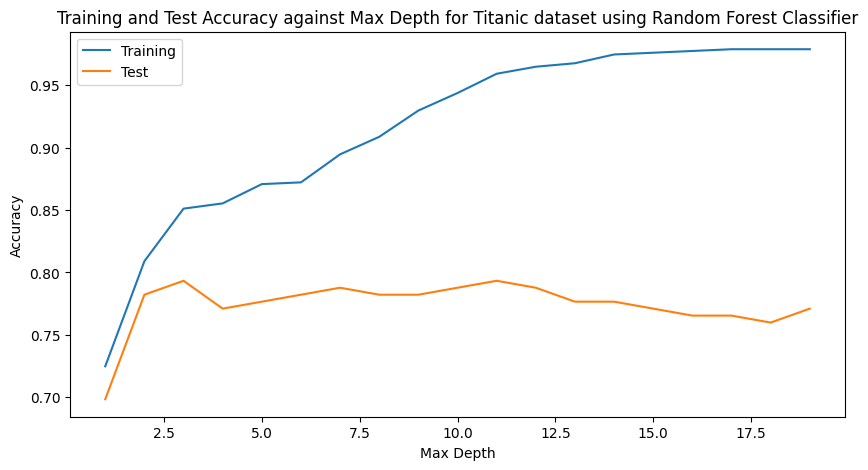

In [66]:
depth_range = range(1, 20)
training_scores = []
test_scores = []
for n in depth_range:
    clf = RandomForestClassifier(max_depth = n, n_estimators = 100, random_state = r)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    training_scores.append(train_score)
    test_score = clf.score(x_test, y_test)
    test_scores.append(test_score)

# Plotting the training and test scores
plt.figure(figsize=(10,5))
plt.plot(depth_range, training_scores, label='Training')
plt.plot(depth_range, test_scores, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy against Max Depth for Titanic dataset using Random Forest Classifier')
plt.legend()
plt.show()

In [67]:
# Finding the best max depth
best_max_depth = depth_range[test_scores.index(max(test_scores))]
print(f"Best prediction for the random forest happens at max depth of {best_max_depth}")

Best prediction for the random forest happens at max depth of 3


### CLASSIFICATION REPORT FOR RANDOM FOREST

In [68]:
# Train the decision tree classifier
modelclf = RandomForestClassifier(random_state=r)
modelclf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = modelclf.predict(x_test)

# Calculate the F1 score
f1 = classification_report(y_test, y_pred)
print(f1)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.71      0.65      0.68        69

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179



In [69]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[92 18]
 [24 45]]


<Figure size 1000x1500 with 0 Axes>

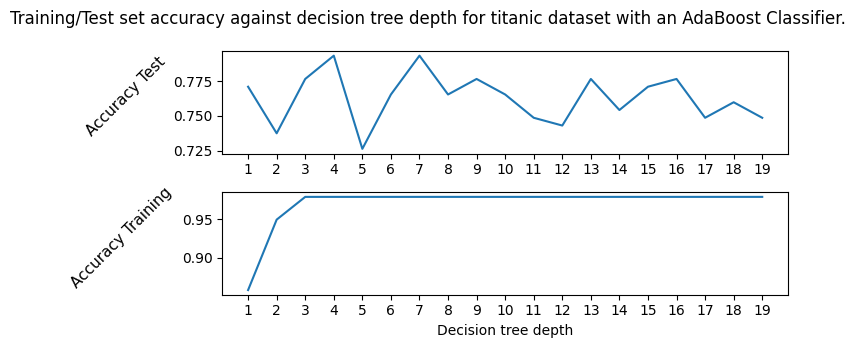

In [76]:
depth_range = range(1, 20)
training_scores = []
test_scores = []
for n in depth_range:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=n), n_estimators = 100)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    training_scores.append(train_score)
    test_score = clf.score(x_test, y_test)
    test_scores.append(test_score)

plt.figure(figsize=(10,15)) 
fig, axs = plt.subplots(2)
axs[0].plot(depth_range, test_scores)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = plt.GridSpec(2, 2)
ax.update(wspace=0.5, hspace=0.5)
plt.xlabel("Decision tree depth")
axs[0].xaxis.set_ticks(depth_range)
fig.suptitle('Training/Test set accuracy against decision tree depth for titanic dataset with an AdaBoost Classifier.')
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
axs[1].plot(depth_range, training_scores)
axs[1].xaxis.set_ticks(depth_range)
axs[0].set_ylabel('Accuracy Test', rotation=45, fontsize = 11, labelpad=30)
axs[1].set_ylabel('Accuracy Training', rotation = 45, fontsize = 11, labelpad = 40)
plt.show()
plt.close()

In [71]:
max_value = max(test_scores)
index = test_scores.index(max_value)
print(f" Best prediction for the AdaBoost Classifier happens at max depth of {index + 1}.")

 Best prediction for the AdaBoost Classifier happens at max depth of 8.


In [72]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=r)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate the F1 score
f1 = classification_report(y_test, y_pred)
print(f1)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       110
           1       0.74      0.61      0.67        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179



In [73]:
print('Base model Accuracy:', base_model.score(x_test, y_test))
print()
print('Ensemble model Accuracy:', ensemble.score(x_test, y_test))
print()
print(f'Radom forest Model accuracy: {random_forest_model.score(x_test,y_test)}')
print()
print(f'AdaBoost Classifier Accuracy: {adamodel.score(x_test, y_test)}')

Base model Accuracy: 0.7653631284916201

Ensemble model Accuracy: 0.7932960893854749

Radom forest Model accuracy: 0.776536312849162

AdaBoost Classifier Accuracy: 0.770949720670391


ROC AUC Score: 0.8311594202898551


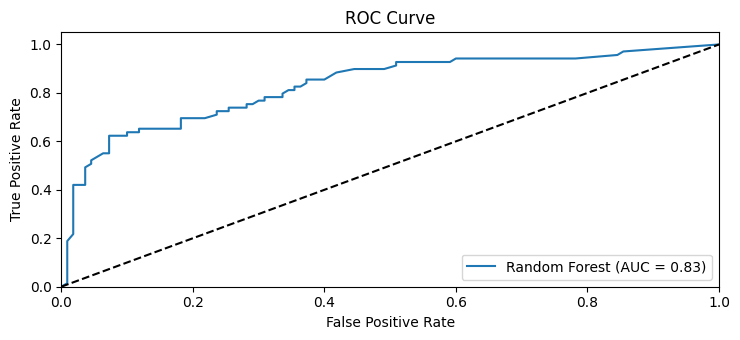

In [74]:


# Train the random forest classifier
modelclf = RandomForestClassifier(n_estimators=100, random_state=r)
modelclf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_prob = modelclf.predict_proba(x_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label="Random Forest (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()